In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
from tqdm import tqdm

## I) Data Preprocessing

In [2]:
#prob
paths = pd.read_csv('../database/paths.sql',error_bad_lines=False,  sep='\t', names = ['line_id', 'path_id', 'english_name', 'french_name', 'arabic_name', 'tag'])

In [3]:
#preprocessing
paths.iloc[8,-1] = '0'
ch = paths.iloc[25,-1]
paths.iloc[25,-2] = (paths.iloc[25,-2] + ch).replace('//','')
paths.iloc[25,-1] = 1

In [4]:
paths.tag = paths.tag.astype(int)

In [5]:
paths.head()

,line_id,path_id,english_name,french_name,arabic_name,tag
0,1,8,Intilaka vers Barcelona,Intilaka vers Barcelone,الإنطلاقة في إتجاه برشلونة,1
1,3,8,Barcelone to Intilaka,Barcelona vers Intilaka,برشلونة في إتجاه الإنطلاقة,0
2,4,4,Tunis Marine to Campus Manouba,Tunis Marine vers Campus Manouba,تونس البحرية في إتجاه المركب الجامعي بمنوبة,0
3,5,4,Campus Manouba toTunis Marine,Campus Manouba vers Tunis Marine,المركب الجامعي بمنوبة في إتجاه تونس البحرية,1
4,6,2,Republique to Ariana,Republique vers Ariana,الجمهورية في إتجاه أريانة,0


In [6]:
stops = pd.read_csv('../database/stops.sql', error_bad_lines=False,  sep='\t', names = ['english_name', 'french_name', 'arabic_name', 'latitude', 'longitude'])
stops = stops.reset_index().rename({'index':'station_id'},axis=1)
stops.head()

,station_id,english_name,french_name,arabic_name,latitude,longitude
0,15,TUNIS MARINE,TUNIS MARINE,تونس البحرية,36.800174,10.190487
1,16,STREET OF TURKISH,RUE DE LA TURQUIE,نهج تركيا,36.799103,10.186369
2,20,MONCEF BEY,MONCEF BEY,المنصف باي,36.792631,10.185839
3,21,HOPSPITAL MILITARY,HOPITAL MILITAIRE,المستشفى العسكري,36.785595,10.179933
4,22,HOPITAL HABIB THAMEUR,HOPITAL HABIB THAMEUR,مستشفى الحبيب ثامر,36.784376,10.175823


In [7]:
path_stop = pd.read_csv('../database/path_stop.sql', sep='\t', names = ['id', 'line_id', 'station_id', 'order']).drop('id',axis=1)
path_stop.head()

,line_id,station_id,order
0,1,1,1
1,1,2,2
2,1,3,3
3,1,4,4
4,1,5,5


In [9]:
lines = pd.read_csv('../database/lines.sql', sep='\t').drop(['2.2','2.3'],axis = 1).rename({'2':'path_id','2.1':'line_label'},axis=1)
lines.head()

,path_id,line_label
0,4,104
1,6,Empty Line
2,7,6
3,8,5
4,9,3


### 1) Generate station paths : merge path_stop with stops

In [10]:
station_paths = path_stop.merge(stops, on='station_id').sort_values(['line_id','order'])
station_paths.head()

,line_id,station_id,order,english_name,french_name,arabic_name,latitude,longitude
268,1,161,1,CITE EL INTILAKA,CITE EL INTILAKA,حي الإنطلاقة,36.838918,10.117072
266,1,160,2,ETTADHAMEN,ETTADHAMEN,التضامن,36.835840,10.117590
455,1,105,3,OMRANE SUPÉRIEUR,OMRANE SUPÉRIEUR,العمران الأعلى,36.830582,10.124005
264,1,159,4,ETTAHRIR,ETTAHRIR,التحرير,36.829180,10.128620
260,1,158,5,LES JASMINS,LES JASMINS,الياسمين,36.825880,10.134540


In [11]:
station_paths.isnull().sum()

line_id         0
station_id      0
order           0
english_name    0
french_name     0
arabic_name     0
latitude        3
longitude       0
dtype: int64

In [12]:
#fix foyer bardo 2 station coordinates
station_paths.iloc[301,-2] = 36.818324
station_paths.iloc[301,-1] = 10.141400

#fix stade ibn kholdoun station coordiantes
station_paths.iloc[286,-2] = 36.833022
station_paths.iloc[286,-1] = 10.136255

#fix mosque ibn kholdoun station coordinates
station_paths.iloc[284,-2] = 36.829171
station_paths.iloc[284,-1] = 10.135974

In [13]:
station_paths.isnull().sum()

line_id         0
station_id      0
order           0
english_name    0
french_name     0
arabic_name     0
latitude        0
longitude       0
dtype: int64

In [14]:
station_paths.head()

,line_id,station_id,order,english_name,french_name,arabic_name,latitude,longitude
268,1,161,1,CITE EL INTILAKA,CITE EL INTILAKA,حي الإنطلاقة,36.838918,10.117072
266,1,160,2,ETTADHAMEN,ETTADHAMEN,التضامن,36.835840,10.117590
455,1,105,3,OMRANE SUPÉRIEUR,OMRANE SUPÉRIEUR,العمران الأعلى,36.830582,10.124005
264,1,159,4,ETTAHRIR,ETTAHRIR,التحرير,36.829180,10.128620
260,1,158,5,LES JASMINS,LES JASMINS,الياسمين,36.825880,10.134540


### 2) Genetrate line_paths : merge lines with paths

In [15]:
lines = lines.append({'path_id':2,'line_label':'2'},ignore_index=True)

In [16]:
line_paths = paths.merge(lines,on='path_id')
line_paths.to_csv('data/line_paths.csv', index=False)
line_paths.head()

,line_id,path_id,english_name,french_name,arabic_name,tag,line_label
0,1,8,Intilaka vers Barcelona,Intilaka vers Barcelone,الإنطلاقة في إتجاه برشلونة,1,5
1,3,8,Barcelone to Intilaka,Barcelona vers Intilaka,برشلونة في إتجاه الإنطلاقة,0,5
2,4,4,Tunis Marine to Campus Manouba,Tunis Marine vers Campus Manouba,تونس البحرية في إتجاه المركب الجامعي بمنوبة,0,104
3,5,4,Campus Manouba toTunis Marine,Campus Manouba vers Tunis Marine,المركب الجامعي بمنوبة في إتجاه تونس البحرية,1,104
4,6,2,Republique to Ariana,Republique vers Ariana,الجمهورية في إتجاه أريانة,0,2


### 3) Final station paths merging and preprocessing

In [17]:
station_paths = station_paths.merge(line_paths[['line_id','path_id','line_label','tag']], on = 'line_id')

In [18]:
def vehicle(x):
    if x == 'TGM' : 
        # 1 for TGM
        return 1
    elif x in ['1','2','3','4','5','6'] :
        #2 for Metro
        return 2
    else:
        #3 for Bus
        return 3

In [19]:
station_paths['vehicle_type'] = station_paths.line_label.apply(vehicle)
station_paths.head()

,line_id,station_id,order,english_name,french_name,arabic_name,latitude,longitude,path_id,line_label,tag,vehicle_type
0,1,161,1,CITE EL INTILAKA,CITE EL INTILAKA,حي الإنطلاقة,36.838918,10.117072,8,5,1,2
1,1,160,2,ETTADHAMEN,ETTADHAMEN,التضامن,36.835840,10.117590,8,5,1,2
2,1,105,3,OMRANE SUPÉRIEUR,OMRANE SUPÉRIEUR,العمران الأعلى,36.830582,10.124005,8,5,1,2
3,1,159,4,ETTAHRIR,ETTAHRIR,التحرير,36.829180,10.128620,8,5,1,2
4,1,158,5,LES JASMINS,LES JASMINS,الياسمين,36.825880,10.134540,8,5,1,2


<AxesSubplot:>

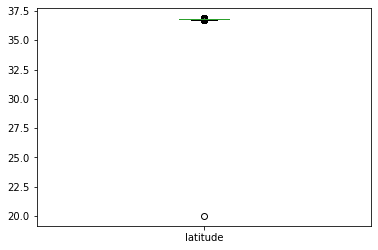

In [20]:
station_paths.latitude.plot(kind='box')

<AxesSubplot:>

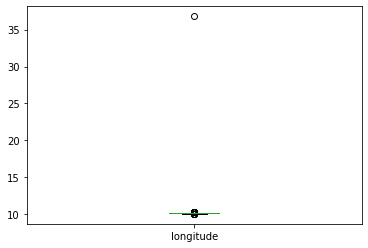

In [21]:
station_paths.longitude.plot(kind='box')

In [22]:
#stop correction
station_paths.loc[343,'arabic_name'] = '20 مارس'
station_paths.loc[343,'latitude'] = 36.807718
station_paths.loc[343,'longitude'] = 10.139172

In [23]:
#assing a unique id for each station

unique_coords = station_paths[['latitude', 'longitude']].drop_duplicates().reset_index(drop=True)

n = unique_coords.shape[0]
unique_station_id = np.arange(1,n+1)

unique_coords['station_id'] = unique_station_id

station_paths.drop('station_id', axis=1, inplace=True)

station_paths = unique_coords.merge(station_paths, on = ['latitude', 'longitude'])
station_paths = station_paths.sort_values(['line_id','order'])

In [24]:
station_paths = station_paths[~station_paths[['line_id','station_id']].duplicated()]

In [25]:
station_paths[['line_id','station_id']].duplicated().unique()

array([False])

In [26]:
#correct order
station_paths['order'] = station_paths.groupby('line_id').order.cumcount() + 1

### correct duplicated stops labels with same coordinates : 

In [27]:
station_paths_unique = station_paths[['french_name','english_name','arabic_name','station_id']].drop_duplicates()

In [28]:
mask = station_paths_unique.station_id.duplicated()

In [29]:
duplicated_stations = station_paths_unique[mask].station_id.values
duplicated_stations

array([ 35,  28,  23, 138, 137, 161])

In [30]:
replace_english = dict((key,value) \
                  for key, value in \
                  zip(station_paths_unique[station_paths_unique.station_id.isin(duplicated_stations)].groupby('station_id').english_name.last().values,\
                      station_paths_unique[station_paths_unique.station_id.isin(duplicated_stations)].groupby('station_id').english_name.first().values) )

In [31]:
replace_french = dict((key,value) \
                 for key, value in \
                 zip(station_paths_unique[station_paths_unique.station_id.isin(duplicated_stations)].groupby('station_id').french_name.last().values,\
                     station_paths_unique[station_paths_unique.station_id.isin(duplicated_stations)].groupby('station_id').french_name.first().values) )

In [32]:
replace_arabic = dict((key,value) \
                 for key, value in \
                 zip(station_paths_unique[station_paths_unique.station_id.isin(duplicated_stations)].groupby('station_id').arabic_name.last().values,\
                     station_paths_unique[station_paths_unique.station_id.isin(duplicated_stations)].groupby('station_id').arabic_name.first().values) )

In [33]:
replace_english

{'DARGHOUTH PACHA STREET': 'UNIVERSITÉ IBN CHARAF',
 'CHEBBI': 'CHEBBI',
 'GOUVERNORAT MANOUBA': 'GOVERNORATE MANOUBA',
 'HABIB BOUGATFA AVENUE - FOYER BARDO 2': 'FOYER BARDO 2',
 'RAS TABIA - TRAINING CENTER': 'CENTER DE FORMATION RAS TABIA',
 'Thamer Garden': 'HABIB THAMEUR'}

In [34]:
replace_french

{'RUE DARGHOUTH PACHA': 'UNIVERSITÉ IBN CHARAF',
 'CHEBBI': 'CHEBBI',
 'GOUVERNORAT MANOUBA': 'GOUVERNORAT MANOUBA',
 'AVENUE HABIB BOUGATFA - FOYER BARDO 2': 'FOYER BARDO 2',
 'RAS TABIA - CENTRE DE FORMATION': 'CENTER DE FORMATION RAS TABIA',
 'Jardin Thamer': 'HABIB THAMEUR'}

In [35]:
replace_arabic

{'نهج درغوث باشا': 'جامعة ابن شرف',
 'الشابي': 'الشابى',
 'ولاية منوبة': 'ولاية منوبة',
 'شارع الحبيب بوقطفة - مبيت باردو 2': 'مبيت باردو 2',
 'راس طابية - مركز التكوين': 'مركز التكوين رأس الطابية',
 'حديقة ثامر': 'الحبيب ثامر'}

In [36]:
#replace duplicated stops labels with same coordinates
station_paths.english_name = station_paths.english_name.replace(replace_english)
station_paths.french_name = station_paths.french_name.replace(replace_french)
station_paths.arabic_name = station_paths.arabic_name.replace(replace_arabic)

In [37]:
#verification
station_paths_unique = station_paths[['french_name','english_name','arabic_name','station_id']].drop_duplicates()
mask = station_paths_unique.station_id.duplicated()
duplicated_stations = station_paths_unique[mask].station_id.values
print('no duplicated stops labels !') if len(duplicated_stations) == 0 else print('there are still some duplicated labels')

no duplicated stops labels !


### data checkpoint

In [38]:
station_paths.to_csv('data/stations_paths.csv',index=False)

In [39]:
paths.to_csv('data/paths.csv', index = False)

In [40]:
station_paths.shape

(700, 12)

In [41]:
paths.shape

(45, 6)

## II) Pick Time Algorithm

### 1) Haversine formula

In [42]:
def haversine_distance(x,y):
    R = 6378137 #in meter

    #convert to raduis
    lat1  = x[0] * np.pi/180
    long1 = x[1] * np.pi/180
    lat2  = y[0] * np.pi/180
    long2 = y[1] * np.pi/180
    
    #calculate haversine distance
    delta_longitude = long1 - long2
    delta_latitude = lat1 - lat2
    a = (np.sin(delta_latitude/2)**2) + np.cos(lat1)*np.cos(lat2)*(np.sin(delta_longitude/2)**2)
    c = 2*np.arctan2(np.sqrt(a),np.sqrt(1-a))
    distance = R*c
    
    return distance

### 2) Stops Clustering ( inductive unsupervised learning )

In [43]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_blobs

In [44]:
line_vehicletype = dict((key,value['line_id']) \
                        for key, value in station_paths[['line_id','vehicle_type']].drop_duplicates().groupby('vehicle_type').agg(list).T.to_dict().items())

In [45]:
def affinity(x):    
    return pairwise_distances(x, metric=haversine_distance)

In [46]:
model=AgglomerativeClustering(n_clusters=None, distance_threshold=1000, affinity=affinity, linkage='average')
model.fit(station_paths[['latitude','longitude']].values) 
station_paths['station_cluster'] = model.labels_

In [47]:
len(np.unique(model.labels_))

48

In [48]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(station_paths[['latitude','longitude']], station_paths.station_cluster)

KNeighborsClassifier(n_neighbors=1)

In [49]:
centers = station_paths[['latitude','longitude','station_cluster']].groupby('station_cluster').mean().values
std = np.ones(centers.shape)*0.001
centroids = station_paths[['latitude','longitude','station_cluster']].groupby('station_cluster', as_index=False).mean()

In [ ]:
#test data simulation :

X,_ = make_blobs(n_samples=10000,
                  cluster_std= std,
                  centers=centers,
                  random_state=2021)

y = []
for simulation in X:
    for coords in centroids.values : 
        distance = haversine_affinity(simulation, coords[1:])
        if distance < 1000 : 
            y.append(coords[0])
            break

In [ ]:
y_pred = knn.predict(X)
print(accuracy_score(y, y_pred))

In [ ]:
def extract_vehicletype(line):
    if line in line_vehicletype[1]:
        return 1
    elif line in line_vehicletype[2]:
        return 2
    else:
        return 3

In [ ]:
grouped_vehicle_cluster_stations = station_paths[['vehicle_type','station_cluster','station_id','latitude','longitude']]\
                                    .groupby(['vehicle_type','station_cluster'], as_index=False)\
                                    .agg(list)

vehicle_cluster_stations_dict = {}

for vehicle_type, station_cluster, station_id, latitude, longitude in  grouped_vehicle_cluster_stations.values :
    
    listOfgroups = []
    for st, lat, long in zip(station_id, latitude, longitude) :
        listOfgroups.append([st, lat, long])
    
    vehicle_cluster_stations_dict[(vehicle_type, station_cluster)] = listOfgroups

### 3) GPS records picking algorithm

In [47]:
import gc

# a register that tracks last records for each couple of (vehicle_id,station_id)
# (vehicle_id, station_id)  : [min_distance, time ,full gps_record]

#algorithm details : 
# let's call each couple of (vehicle_id, station_id) a cell
# if a vehicle is not in a range of 100 meters from a station, the cell is not active (via flag dictionary) and do not record any data from gps
# once a vehicle is in a range of 100 meters, the cell is activated and will register records as long as they are closer to the station
# than its previous registred records
# if the vehicle get's out of the 100 meters range from a station for the first time, we extract the last closet record to the station and the cell will be 
# desactivated once again
# or if the vehicle is in the range of 100 meters but there was more than 20 minutes from the last record, in this case maybe the vehicle got out 
# of the range and didn't send any record until it got once again in the range of 100 meters from the station
# in this case we extract the last record
# if the vehicle didn't get out of the station range for more than 20 minutes, then we will extract many records for the same staion, this won't be a problem
# because we can exclude these records later when we perform some preprocessing to get sequences of successive stations records.

#station[1] : station_id
#record[0] : vehicle_id from gps records
#record[-1] : datetime from gps records

size_chunk = int(input('please set the size of a chunk:\n'))
skip = int(input('please set the number of chunks to skip, set 0 if no chunks are skipped:\n')) 

names = ['index', 'vehicle_id', 'vehicle_type', 'line_id', 'latitude', 'longitude', 'unkn_1', 'unkn_2', 'unkn_3', 'direction', 'unkn_4', 'unkn_5', 'datetime', 'last_modified']
full_gps = pd.read_csv('../database/gps.sql', chunksize=size_chunk, sep='\t', names=names)

register = {}
flag = {}
#list of extracted gps records
chunk = 1
distance_range = 100 # range where we start picking the gps records (in meters)
time_range = 20 # 20 minutes (difference between records) to reactivate the cell

print('\n')
print('- - - - - - - - - PICK - TIME - ALGORITHM - - - - - - - - -')


print('Loading data chunk N°: ',chunk,' ...', end = ' ')
for gps in full_gps :
    
    if chunk < skip+1 :
        print('skip chunk')
        chunk += 1
        print('Loading data chunk N°: ',chunk,' ...', end = ' ')
        continue
    
    extracted_records = []
    print('done')
    

    #drop features
    print('GPS data preprocessing ...', end = ' ')
    gps.drop(['index','vehicle_type','last_modified','unkn_1','unkn_2','unkn_3','unkn_4','unkn_5','direction'], axis=1, inplace=True)
    gps.datetime = gps.datetime.apply(lambda x : datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
    print('done')

    #sorting by vehicle_id, datetime and vehicle is critical to the pick algorithm
    gps = gps.sort_values(['line_id','vehicle_id','datetime'])
    gps = gps.drop_duplicates()
    
    print('Vehicle types affectation ...', end=' ')
    #vehicle types
    vehicle_types = gps.line_id.apply(extract_vehicletype).values
    print('done')

    print('Station clusters prediction ...', end=' ')
    #records station clusters predictions
    station_clusters = knn.predict(gps[['latitude','longitude']])
    print('done')
    
    i = -1  #reset counter
    for record in tqdm(gps.values, position=0, leave=True, desc='stops time picking : ') :
        i += 1 #increment stations cluster prediction and vehicle types counter for each record

        if not (vehicle_types[i],station_clusters[i]) in vehicle_cluster_stations_dict:
            continue
        
        for station, latitude, longitude in vehicle_cluster_stations_dict[(vehicle_types[i],station_clusters[i])] : 
            
            distance =  haversine_distance([record[2],record[3]],[latitude,,longitude])  #calculate distance
            
            if distance < distance_range :
                flag[(record[0],station)] = 1

                if (record[0],station) in register:
                    if distance < register[(record[0],station)][0]:
                        register[(record[0],station)] = [distance,record] #update dmin in register for a specific vehicle and stop ids
                else:
                    register[(record[0],station)] = [distance,record]   #add the vehicle_id, station_id couple to the register

            elif (record[0],station) in register : 
                #reset cell and pick last registred record
                if flag[(record[0],station)] == 1 :
                    flag[(record[0],station)] = 0
                    rec = np.concatenate([register[(record[0],station)][-1],[station]])
                    extracted_records.append(rec)       #pick the last registred record
                    register[(record[0],station)][0] = np.inf     #reset the cell (vehicle_id,station_id)           

    print('Extracted records : ', len(extracted_records))
    
    #checkpoint
    print('data checkpoint ...', end=' ')
    cols = ['vehicle_id','line_id','latitude','longitude','datetime','station_id']
    extracted_records = pd.DataFrame(data=extracted_records, columns=cols)
    extracted_records['vehicle_type'] = extracted_records.line_id.apply(extract_vehicletype)
    extracted_records = extracted_records.sort_values(['vehicle_id','datetime']).reset_index(drop=True)
    extracted_records.to_csv('./data/stoptime/picktime_chunk{}.csv'.format(chunk), index = False)
    
    print('done')
    print('- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -')
    chunk += 1
    print('Loading data chunk N°: ',chunk,' ...', end = ' ')
    del extracted_records
    gc.collect()

Loading data chunk N°:  1  ... pass chunk
Loading data chunk N°:  2  ... pass chunk
Loading data chunk N°:  3  ... pass chunk
Loading data chunk N°:  4  ... pass chunk
Loading data chunk N°:  5  ... pass chunk
Loading data chunk N°:  6  ... pass chunk
Loading data chunk N°:  7  ... pass chunk
Loading data chunk N°:  8  ... pass chunk
Loading data chunk N°:  9  ... pass chunk
Loading data chunk N°:  10  ... pass chunk
Loading data chunk N°:  11  ... pass chunk
Loading data chunk N°:  12  ... pass chunk
Loading data chunk N°:  13  ... pass chunk
Loading data chunk N°:  14  ... pass chunk
Loading data chunk N°:  15  ... pass chunk
Loading data chunk N°:  16  ... pass chunk
Loading data chunk N°:  17  ... pass chunk
Loading data chunk N°:  18  ... pass chunk
Loading data chunk N°:  19  ... pass chunk
Loading data chunk N°:  20  ... pass chunk
Loading data chunk N°:  21  ... pass chunk
Loading data chunk N°:  22  ... pass chunk
Loading data chunk N°:  23  ... done
GPS data preprocessing ...

100%|██████████| 4977320/4977320 [13:13<00:00, 6275.54it/s]


Extracted records :  93597
data checkpoint ... done
******************************************************
Loading data chunk N°:  24  ... done
GPS data preprocessing ... done
Vehicule types affectation ... done
Station clusters prediction ... done
Picking records ... 

100%|██████████| 1834886/1834886 [04:24<00:00, 6933.64it/s]


Extracted records :  33731
data checkpoint ... done
******************************************************
Loading data chunk N°:  25  ... 

## III) Correct and check GPS records

In [51]:
station_paths = pd.read_csv('data/stations_paths.csv')
station_paths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   latitude      700 non-null    float64
 1   longitude     700 non-null    float64
 2   station_id    700 non-null    int64  
 3   line_id       700 non-null    int64  
 4   order         700 non-null    int64  
 5   english_name  700 non-null    object 
 6   french_name   700 non-null    object 
 7   arabic_name   700 non-null    object 
 8   path_id       700 non-null    int64  
 9   line_label    700 non-null    object 
 10  tag           700 non-null    int64  
 11  vehicle_type  700 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 65.8+ KB


In [53]:
#join all chunks
cols = ['vehicle_id','line_id','latitude','longitude','datetime','station_id']
data_records = pd.DataFrame(columns=cols)
    
for i in range(1,25):
    data_records = data_records.append(pd.read_csv('data/stoptime/picktime_chunk{}.csv'.format(i)), ignore_index=True)

data_records.to_csv('data/picktime.csv')

In [54]:
data_records = pd.read_csv('data/picktime.csv')
data_records.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2596092 entries, 0 to 2596091
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   Unnamed: 0     int64  
 1   vehicle_id     float64
 2   line_id        int64  
 3   latitude       float64
 4   longitude      float64
 5   datetime       object 
 6   station_id     int64  
 7   vehicule_id    float64
 8   vehicule_type  float64
dtypes: float64(5), int64(3), object(1)
memory usage: 178.3+ MB


In [55]:
data_records.datetime = data_records.datetime.apply(lambda x : datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
data_records = data_records.sort_values(['vehicle_id','datetime'])
data_records.reset_index(drop=True, inplace=True)
data_records.shape

(2596092, 9)

In [155]:
first = station_paths[['line_id','station_id','line_label','order']].sort_values(['line_id','order']).groupby('line_id').station_id.first().to_dict()
last = station_paths[['line_id','station_id','line_label','order']].sort_values(['line_id','order']).groupby('line_id').station_id.last().to_dict()
all_terminals = set(list(first.values()) + list(last.values()))
terminalsByLine = dict( (key,[value]) for key, value in first.items())
for key, value in last.items():
    terminalsByLine[key].append(value)

In [156]:
staion_id_line = dict( (key,value['station_id']) for key, value in station_paths[['vehicle_type','line_id','station_id']].groupby(['vehicle_type','line_id']).agg(list).T.to_dict().items())
stations_coords = dict( (int(key), [v1,v2]) for key, v1, v2 in station_paths[['station_id','latitude','longitude']].drop_duplicates().values)

In [157]:
def affect_seqID(*x):
    vehicle = x[0]
    station = x[1]
    line = x[2]
    time = x[3]
    vehicle_type = x[4]
    
    # if the vehicule is already in one of the dictionaries (it doesn't matter which one)
    # then check if the vehicule is still on the same sequence or not
    # else, intiate a sequence ID to the current (new) vehicule 
    if vehicle in stations_passed : 
        #if the current vehicle is different than the previous record
        #or the current path is different than the previous record
        #or the last stop was a terminal that belongs to the last record path
        #or the current stop has been visited by the same vehicle in the current sequence
        #or between two records there is more than 30 minutes difference
        #then increment sequence ID for the current vehicule
        #else return the same sequence ID
        if last_line[vehicle] != line \
        or terminal_flag['flag'] \
        or station in stations_passed[vehicle] \
        or ((time - last_time[vehicle]).total_seconds()//60) > 30 : 
            seqID[vehicle] += 1 #increment sequence ID
            stations_passed[vehicle] = [] #reset past stations records
            terminal_flag['flag'] = False  #reset terminal flag
        elif station in terminalsByLine[line] :
            terminal_flag['flag'] = True #activate terminal flag
        
        last_line[vehicle] = line
        last_time[vehicle] = time
        stations_passed[vehicle].append(station)
        return str(vehicle) + '_' + str(seqID[vehicle])

    else :
        last_line[vehicle] = line
        seqID[vehicle] = 0
        stations_passed[vehicle] = [station]
        last_time[vehicle] = time
        return str(vehicle) + '_' + str(seqID[vehicle])

In [158]:
def correct_line_id(vehicle_type, rec_line_id, rec_stations):
    
    stations_matched_cumdist = {}
    
    for key, stations in staion_id_line.items() : 
        if key[0] != vehicle_type : 
            continue
        else:
            line_id = key[1]
        order = 0
        distance = 0
        first = True
        last_station = None
        
        for station in rec_stations : 
            for i,staion_line in enumerate(stations[order:]):
                if station == staion_line:
                    if first:
                        first = False
                        last_station = station
                    else:
                        coord1 = stations_coords[last_station]
                        coord2 =  stations_coords[station]
                        distance += haversine_distance(coord1, coord2)
                        last_station = station
                    order  = i+1
                    break
                    
        stations_matched_cumdist[line_id] = distance
    

    #return line_id with max cummulative distance (respect order of stops)
    sorted_stations_matched_cumdist = sorted(stations_matched_cumdist.items(), key = lambda x : x[-1], reverse = True)

    if stations_matched_cumdist[rec_line_id] == sorted_stations_matched_cumdist[0][1] :   #if record line_id has the same distance as the new line_id candidate
        return rec_line_id                                                                #record line_id from gps will have 1st priority
    
    return sorted_stations_matched_cumdist[0][0]

In [159]:
iteration = 1
corrected_lines = -1
n = data_records.shape[0]

while corrected_lines != 0 :
    print('correcting paths : iteration N°: ',iteration)
    iteration += 1
    
    #grouping records into sequences
    last_line = {}
    last_time = {}
    seqID = {}
    stations_passed = {}
    terminal_flag = {'flag':True}
    print('grouping records into sequences of stops ...', end=' ')
    data_records['sequence_id'] = data_records[['vehicle_id','station_id','line_id','datetime','vehicle_type']].apply(lambda x : affect_seqID(*x), axis=1)
    print('done')
    
    #grouping sequences
    sequences_groups = data_records[['sequence_id','vehicle_type','line_id','station_id']].groupby('sequence_id') \
                                                                                          .agg({'vehicle_type':'first','line_id':'first', 'station_id':list}) \
                                                                                          .reset_index()
    #correct lines
    correct_id = pd.Series(data=np.nan, index=sequences_groups.sequence_id)
    for sequence_id, vehicle_type, rec_line_id, rec_stations in tqdm(sequences_groups.values, position=0, leave=True, desc='path correction : '):
        correct_id.loc[sequence_id] = correct_line_id(vehicle_type, rec_line_id, rec_stations)
    
    #affect new line ids
    data_records['correct_line_id'] = data_records.sequence_id.map(correct_id)
    corrected_lines = data_records.query('line_id != correct_line_id').shape[0]
    data_records.line_id = data_records.correct_line_id
    print('wrong path report :   percentage = {:.2f}%'.format(corrected_lines*100 / n),'   count = ',corrected_lines )
    print('- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -')
print('All paths have been checked and corrected with success!')

correcting paths : iteration N°:  1
grouping records into sequences of stops ... done


path correction : 100%|██████████| 231527/231527 [02:00<00:00, 1927.05it/s]


wrong path report :   percentage = 54.40%    count =  1412165
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
correcting paths : iteration N°:  2
grouping records into sequences of stops ... done


path correction : 100%|██████████| 241069/241069 [02:02<00:00, 1962.04it/s]


wrong path report :   percentage = 1.48%    count =  38443
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
correcting paths : iteration N°:  3
grouping records into sequences of stops ... done


path correction : 100%|██████████| 238707/238707 [02:02<00:00, 1954.38it/s]


wrong path report :   percentage = 0.01%    count =  164
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
correcting paths : iteration N°:  4
grouping records into sequences of stops ... done


path correction : 100%|██████████| 238707/238707 [02:01<00:00, 1968.70it/s]


wrong path report :   percentage = 0.00%    count =  0
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
All paths have been checked and corrected with success!


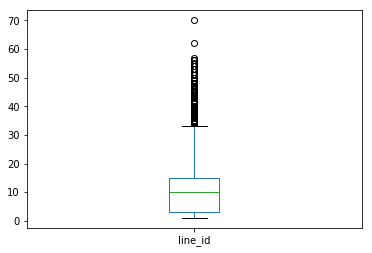

In [160]:
data_records[['line_id','station_id','sequence_id']].groupby('sequence_id').count().line_id.plot(kind = 'box')

In [161]:
data_records = data_records.merge(station_paths[['line_id','station_id','order','line_label']], on=['line_id','station_id'], how='left').dropna()

In [162]:
#grouping records into sequences after merging
last_line = {}
last_time = {}
seqID = {}
stations_passed = {}
terminal_flag = {'flag':True}

data_records['sequence_id'] = data_records[['vehicle_id','station_id','line_id','datetime','vehicle_type']].apply(lambda x : affect_seqID(*x), axis=1)

In [163]:
mask = data_records.groupby('sequence_id').station_id.count() < 2
drop_sequences = data_records.groupby('sequence_id').station_id.count()[mask].index
drop_sequences

Index(['100_0', '100_100', '100_1007', '100_1020', '100_1029', '100_1046',
       '100_1048', '100_1053', '100_106', '100_1063',
       ...
       '99_558', '99_559', '99_560', '99_561', '99_562', '99_65', '99_72',
       '99_76', '99_84', '99_87'],
      dtype='object', name='sequence_id', length=25935)

In [164]:
data_records = data_records[~data_records.sequence_id.isin(drop_sequences)]

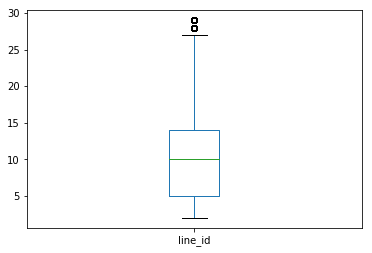

In [165]:
data_records[['line_id','station_id','sequence_id']].groupby('sequence_id').count().line_id.plot(kind = 'box')

In [166]:
data_records = data_records.sort_values(['vehicle_id', 'datetime'])
data_records['order_diff'] = data_records.groupby('sequence_id').order.diff()

In [167]:
def sequenceid(*x):
    vehicle = x[0]
    order_diff = x[1]
    
    if vehicle in seq_id : 
        if order_diff != 1 :
            seq_id[vehicle] += 1 
        return str(vehicle) + '_' + str(seq_id[vehicle])
    else : 
        seq_id[vehicle] = 0 
        return str(vehicle) + '_' + str(seq_id[vehicle])

In [168]:
seq_id = {}

#cut sequences of stops by order difference to get sequences of successive stops
data_records.line_id = data_records.line_id.astype(int)
data_records['sequence_id'] = data_records[['vehicle_id', 'order_diff']].apply(lambda x : sequenceid(*x), axis=1)

In [169]:
mask = data_records.groupby('sequence_id').station_id.count() < 2
drop_sequences = data_records.groupby('sequence_id').station_id.count()[mask].index
drop_sequences

Index(['100.0_100', '100.0_1005', '100.0_1006', '100.0_1007', '100.0_1009',
       '100.0_101', '100.0_1011', '100.0_1015', '100.0_1018', '100.0_1019',
       ...
       '99.0_860', '99.0_862', '99.0_865', '99.0_866', '99.0_867', '99.0_868',
       '99.0_871', '99.0_872', '99.0_873', '99.0_9'],
      dtype='object', name='sequence_id', length=122914)

In [170]:
data_records = data_records[~data_records.sequence_id.isin(drop_sequences)]
data_records.order = data_records.order.astype(int)
data_records.drop(['order_diff', 'correct_line_id'], axis=1, inplace=True)
data_records.shape

(1950296, 10)

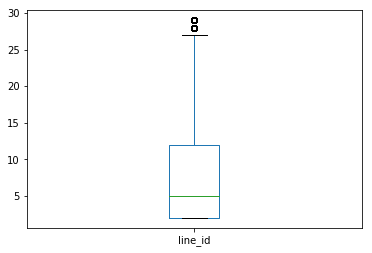

In [171]:
data_records[['line_id','station_id','sequence_id']].groupby('sequence_id').count().line_id.plot(kind = 'box')

In [172]:
data_records.groupby('line_label').count().line_id

line_label
1      170263
104     99348
11       6239
12       3182
15        279
15A       164
15B       115
2      203783
3       58876
32      56858
32B     14743
36        504
36B      1299
4      426347
43         12
43B      1272
4A      31412
5      243052
6      426871
65      22533
78      71209
79      18589
TGM     93346
Name: line_id, dtype: int64

In [173]:
#checkpoint
data_records.to_csv('data/picktime_sequences.csv', index=False)

## IV) Drop Outliers

In [174]:
data_records = pd.read_csv('data/picktime_sequences.csv')
data_records.info()

C:\Users\Aziz\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1950296 entries, 0 to 1950295
Data columns (total 10 columns):
 #   Column        Dtype  
---  ------        -----  
 0   vehicle_id    int64  
 1   line_id       int64  
 2   latitude      float64
 3   longitude     float64
 4   datetime      object 
 5   station_id    int64  
 6   vehicle_type  float64
 7   sequence_id   object 
 8   order         int64  
 9   line_label    object 
dtypes: float64(3), int64(4), object(3)
memory usage: 148.8+ MB


In [175]:
station_paths = pd.read_csv('data/stations_paths.csv')
station_paths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   latitude      700 non-null    float64
 1   longitude     700 non-null    float64
 2   station_id    700 non-null    int64  
 3   line_id       700 non-null    int64  
 4   order         700 non-null    int64  
 5   english_name  700 non-null    object 
 6   french_name   700 non-null    object 
 7   arabic_name   700 non-null    object 
 8   path_id       700 non-null    int64  
 9   line_label    700 non-null    object 
 10  tag           700 non-null    int64  
 11  vehicle_type  700 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 65.8+ KB


In [179]:
#create target : datetime_diff (the time difference in seconds for the vehicle to get to the next station)
data_records.datetime = data_records.datetime.apply(lambda x : datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
data_records['datetime_diff'] = data_records.groupby(['sequence_id']).datetime.diff().shift(-1).dt.total_seconds()

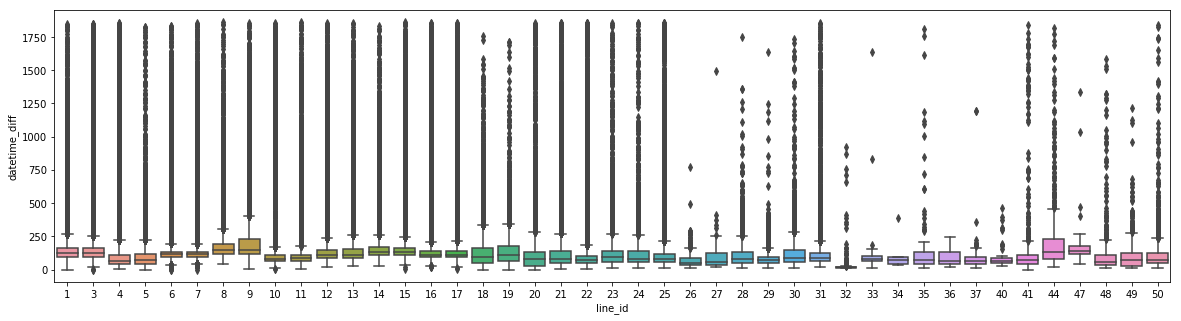

In [180]:
import seaborn as sns
plt.figure(figsize = (20,5))
sns.boxplot(data= data_records, x='line_id', y='datetime_diff')

In [181]:
#select range of datetimes between min (th = 30 secs) and (Q3 + (Q3-Q1)*3)   
#in max_range = Q3 + (Q3-Q1)*3, I chose 3 and not 1.4 because I don't want to remove a lot of outliers
#sometimes huge delays occurs, there mut be a reason why that happens and both the graph and models need to be prepared
#for such delays

line_station_range = data_records.dropna().groupby(['line_id','station_id'],as_index=True).datetime_diff.describe()
EIQ = line_station_range['75%'] - line_station_range['25%']
line_station_range['max_range'] = line_station_range['75%'] +  EIQ * 3
line_station_range['min_range'] = line_station_range['min']
line_station_range = line_station_range[['max_range', 'min_range']].reset_index()

In [182]:
line_station_range = dict( ((line, station), (max_range,min_range)) for line, station, max_range,min_range in line_station_range.values)

In [183]:
def drop_outlier(*record):
    datetime_diff = record[0]
    line_id = record[1] 
    station_id = record[2]
    
    if np.isnan(datetime_diff):
        return False
    
    max_range = line_station_range[(line_id,station_id)][0]
    min_range = line_station_range[(line_id,station_id)][1]
    if min_range < 20 :
        min_range = 20
        
    if datetime_diff > max_range or datetime_diff < min_range:
        return True
    
    return False

In [184]:
mask_drop = data_records[['datetime_diff', 'line_id', 'station_id']].apply(lambda x : drop_outlier(*x), axis=1 )
mask_drop.value_counts()

False    1904104
True       46192
dtype: int64

In [185]:
data_records['outlier'] = data_records[['datetime_diff', 'line_id', 'station_id']].apply(lambda x : 1 if drop_outlier(*x) else 0 , axis=1 )
data_records['outlier']

0          0
1          0
2          0
3          0
4          0
          ..
1950291    0
1950292    0
1950293    0
1950294    0
1950295    0
Name: outlier, Length: 1950296, dtype: int64

In [187]:
data_records.shape

(1950296, 12)

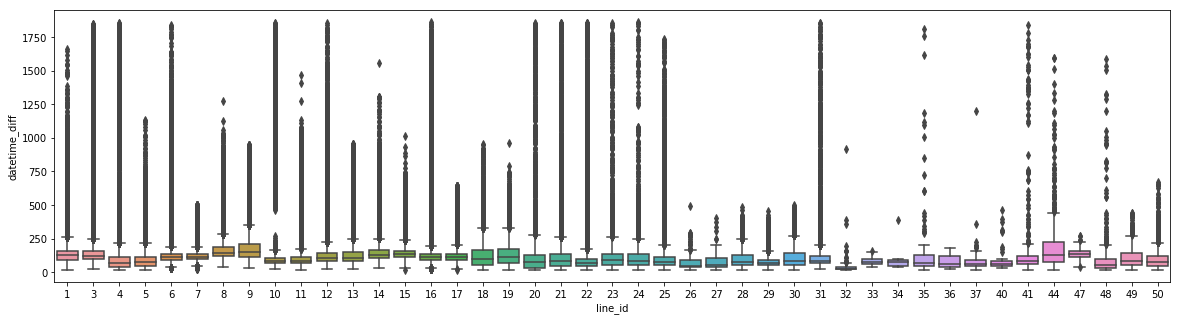

In [189]:
plt.figure(figsize = (20,5))
sns.boxplot(data= data_records[data_records.outlier == 0], x='line_id', y='datetime_diff')

In [190]:
data_records = data_records.reset_index(drop=True)

In [191]:
data_records.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1950296 entries, 0 to 1950295
Data columns (total 12 columns):
 #   Column         Dtype         
---  ------         -----         
 0   vehicle_id     int64         
 1   line_id        int64         
 2   latitude       float64       
 3   longitude      float64       
 4   datetime       datetime64[ns]
 5   station_id     int64         
 6   vehicle_type   float64       
 7   sequence_id    object        
 8   order          int64         
 9   line_label     object        
 10  datetime_diff  float64       
 11  outlier        int64         
dtypes: datetime64[ns](1), float64(4), int64(5), object(2)
memory usage: 178.6+ MB


In [192]:
data_records.to_csv('data/gps_clean.csv', index = False)

## V) Data preprocessing part 2 : Extract full gps sequences data 

### 1) Select sequences of successive stops ( 6 stops or more ) 

In [2]:
station_paths = pd.read_csv('data/stations_paths.csv')
station_paths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   latitude      700 non-null    float64
 1   longitude     700 non-null    float64
 2   station_id    700 non-null    int64  
 3   line_id       700 non-null    int64  
 4   order         700 non-null    int64  
 5   english_name  700 non-null    object 
 6   french_name   700 non-null    object 
 7   arabic_name   700 non-null    object 
 8   path_id       700 non-null    int64  
 9   line_label    700 non-null    object 
 10  tag           700 non-null    int64  
 11  vehicle_type  700 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 65.8+ KB


In [3]:
data_records = pd.read_csv('data/gps_clean.csv', low_memory=False)
data_records.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1950296 entries, 0 to 1950295
Data columns (total 12 columns):
 #   Column         Dtype  
---  ------         -----  
 0   vehicle_id     int64  
 1   line_id        int64  
 2   latitude       float64
 3   longitude      float64
 4   datetime       object 
 5   station_id     int64  
 6   vehicle_type   float64
 7   sequence_id    object 
 8   order          int64  
 9   line_label     object 
 10  datetime_diff  float64
 11  outlier        int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 178.6+ MB


In [4]:
mask = data_records.groupby('sequence_id').station_id.count() > 5
select_sequences = data_records.groupby('sequence_id').station_id.count()[mask].index
select_sequences

Index(['100.0_1', '100.0_1000', '100.0_1010', '100.0_1012', '100.0_102',
       '100.0_1029', '100.0_1030', '100.0_1032', '100.0_104', '100.0_1059',
       ...
       '99.0_880', '99.0_882', '99.0_89', '99.0_90', '99.0_91', '99.0_92',
       '99.0_94', '99.0_95', '99.0_96', '99.0_98'],
      dtype='object', name='sequence_id', length=122812)

In [5]:
data_records = data_records[data_records.sequence_id.isin(select_sequences)]

In [6]:
mask = data_records.groupby('line_label').count().line_id > 1000
selected_paths = data_records.groupby('line_label').count().line_id[mask].index

In [7]:
data_records = data_records[data_records.line_label.isin(selected_paths)]

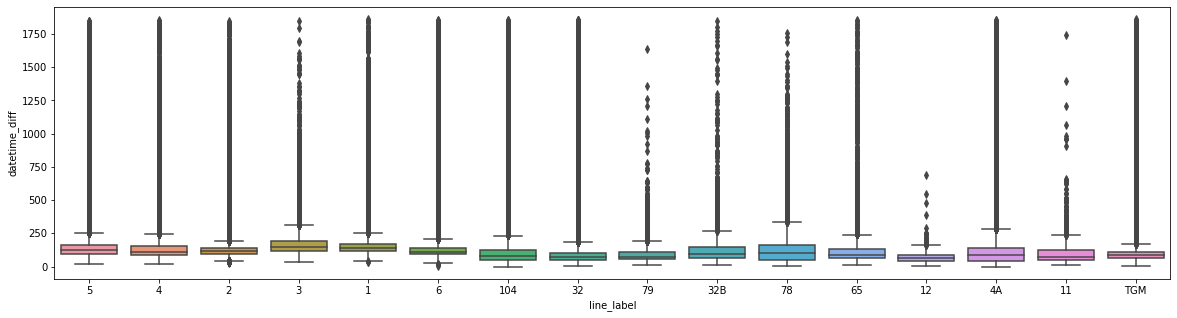

In [8]:
plt.figure(figsize = (20,5))
sns.boxplot(data= data_records, x='line_label', y='datetime_diff');

<AxesSubplot:>

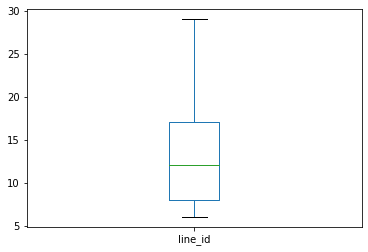

In [9]:
data_records[['line_id','station_id','sequence_id']].groupby('sequence_id').count().line_id.plot(kind = 'box')

In [10]:
data_records = data_records.sort_values(['vehicle_id','datetime'])

In [11]:
#Algorithm parameters init :
data_records_dict = dict( ((vehicle,sequence), datetime) \
                    for vehicle, sequence, datetime in \
                        data_records[['vehicle_id','sequence_id','datetime']].groupby(['vehicle_id','sequence_id'], as_index=False).datetime.agg(list).values )

In [21]:
vehicle_seq = dict( (vehicle, sequences) \
              for vehicle, sequences  in \
                  data_records[['vehicle_id','sequence_id']].groupby('vehicle_id', as_index=False).agg(list).values)

In [25]:
len(vehicle_stop[41])

2963

In [26]:
len(vehicle_seq[41])

2963

### 2) Full sequence picking algorithm

In [35]:
line_vehicletype = dict((key,value['line_id']) \
                        for key, value in station_paths[['line_id','vehicle_type']].drop_duplicates().groupby('vehicle_type').agg(list).T.to_dict().items())

In [36]:
def extract_vehicletype(line):
    if line in line_vehicletype[1]:
        return 1
    elif line in line_vehicletype[2]:
        return 2
    else:
        return 3

In [40]:
import gc
from time import time
from tqdm import tqdm
# full pick tracking cell
# (vehicle_id, sequence_id)  : contains a list of successive datetime stops 

#algorithm details : 
#
#
#
#
#

#Notations: 
#record[0]  : vehicle_id from gps records
#record[-1] : datetime from gps records

size_chunk = int(input('please set the size of a chunk:\n'))

print('full pick time parameters initialization', end=' ... ')
start = time()
names = ['index', 'vehicle_id', 'vehicle_type', 'line_id', 'latitude', 'longitude', 'unkn_1', 'unkn_2', 'unkn_3', 'direction', 'unkn_4', 'unkn_5', 'datetime', 'last_modified']
full_gps = pd.read_csv('../database/gps.sql', chunksize=size_chunk, sep='\t', names=names)

#Algorithm parameters and data structres initialization :
data_records_dict = dict( ((vehicle,sequence), datetime) \
                    for vehicle, sequence, datetime in \
                        data_records[['vehicle_id','sequence_id','datetime']].groupby(['vehicle_id','sequence_id'], as_index=False).datetime.agg(list).values )

vehicle_seq = dict( (vehicle, sequences) \
              for vehicle, sequences in \
                  data_records[['vehicle_id','sequence_id']].groupby('vehicle_id', as_index=False).agg(list).values)

vehicle_stop = dict( (vehicle, station_id) \
                  for vehicle, station_id  in \
                      data_records[['vehicle_id','station_id']].groupby('vehicle_id', as_index=False).agg(list).values)

last_seq = {}
rec    = {}
total_seqs = data_records.sequence_id.nunique()
chunk = 1
seq_progress = 0
stop = time()
print('done in {:.2f} second(s)'.format(stop - start))

print('\n')
print('- - - - - - - - SEQUENCE - PICK - ALGORITHM - - - - - - - - - - -')

start = time()
for gps in full_gps :
    print('Loading data chunk N°: ', chunk, ' ...', end=' ')

    extracted_records = []
    stop = time()
    print('done in {:.2f} second(s)'.format(stop - start))

    
    print('GPS data preprocessing ...', end=' ')
    start = time()
    
    #drop features
    gps.drop(['index','vehicle_type','last_modified','unkn_1','unkn_2','unkn_3','unkn_4','unkn_5'], axis=1, inplace=True)

    #sorting by vehicle_id and datetime is critical for the full pick algorithm
    gps = gps.sort_values(['vehicle_id','datetime'])
    gps = gps.drop_duplicates()
    
    stop = time()
    print('done in {:.2f} second(s)'.format(stop - start))

    for record in tqdm(gps.values, position=0, leave=True, desc='Full sequence picking : ') :            
        
        vehicle = record[0]
        record_datetime = record[-1]

        if vehicle not in rec : 
            rec[vehicle] = False

        try:   
            #extract records
            if rec[vehicle] :
                # extracted_records ==> [ current_sequence_id, last_stop, gps records]
                extracted_records.append(np.concatenate([[vehicle_seq[vehicle][0]], [vehicle_stop[vehicle][0]], record]))
            
            if record_datetime == data_records_dict[(vehicle, vehicle_seq[vehicle][0])][0] :
                #point to the next stop and update algorithms parameters
                del data_records_dict[(vehicle, vehicle_seq[vehicle][0])][0]    #get the next datetime where the vehicle has arrived to a stop
                last_seq[vehicle] = vehicle_seq[vehicle][0]    #save last sequence id
                del vehicle_seq[vehicle][0]     #get the next record sequence id
                del vehicle_stop[vehicle][0]    #get the next record stop id

                #skip records if sequence id has changed until we match the first stop of the new sequence
                if last_seq[vehicle] == vehicle_seq[vehicle][0]:
                    rec[vehicle] = True    #activate records extraction flag
                else :
                    rec[vehicle] = False  #desactivate records extraction flag
                    seq_progress += 1
        except:
            continue

    print('Extracted records : ', len(extracted_records), '    sequence picking progression : {:.2f}%'.format(seq_progress*100 / total_seqs ))
    #break
    #checkpoint
    print('data checkpoint ...', end=' ')
    start = time()
    cols = ['sequence_id','station_id','vehicle_id','line_id','latitude','longitude','direction','datetime']
    extracted_records = pd.DataFrame(data=extracted_records, columns=cols)
    extracted_records['vehicle_type'] = extracted_records.line_id.apply(extract_vehicletype)
    extracted_records = extracted_records.sort_values(['vehicle_id','datetime']).reset_index(drop=True)
    extracted_records.to_csv('data/fullpick/fullpick_chunk{}.csv'.format(chunk), index = False)
    stop = time()
    print('done in {:.2f} second(s)'.format(stop - start))
    
    print('- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -')
    
    chunk += 1
    del extracted_records
    gc.collect()
    start = time()

please set the size of a chunk:
 5000000


full pick time parameters initialization ... done in 5.47 second(s)


- - - - - - - - SEQUENCE - PICK - ALGORITHM - - - - - - - - - - -
Loading data chunk N°:  1  ... done in 32.73 second(s)
GPS data preprocessing ... done in 8.24 second(s)


Full sequence picking : 100%|██████████| 4969459/4969459 [00:35<00:00, 141088.77it/s]


Extracted records :  3739340     sequence picking progression : 4.48%
data checkpoint ... done in 35.96 second(s)
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Loading data chunk N°:  2  ... done in 14.91 second(s)
GPS data preprocessing ... done in 8.41 second(s)


Full sequence picking : 100%|██████████| 4977470/4977470 [00:34<00:00, 142777.11it/s]


Extracted records :  3795103     sequence picking progression : 8.91%
data checkpoint ... done in 38.07 second(s)
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Loading data chunk N°:  3  ... done in 39.62 second(s)
GPS data preprocessing ... done in 9.79 second(s)


Full sequence picking : 100%|██████████| 4978036/4978036 [00:35<00:00, 141249.84it/s]


Extracted records :  3732301     sequence picking progression : 13.28%
data checkpoint ... done in 39.72 second(s)
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Loading data chunk N°:  4  ... done in 14.26 second(s)
GPS data preprocessing ... done in 9.46 second(s)


Full sequence picking : 100%|██████████| 4977967/4977967 [00:15<00:00, 331778.53it/s]


Extracted records :  1126410     sequence picking progression : 16.14%
data checkpoint ... done in 12.35 second(s)
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Loading data chunk N°:  5  ... done in 35.37 second(s)
GPS data preprocessing ... done in 11.16 second(s)


Full sequence picking : 100%|██████████| 4973276/4973276 [00:15<00:00, 318427.38it/s]


Extracted records :  1203462     sequence picking progression : 19.17%
data checkpoint ... done in 14.65 second(s)
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Loading data chunk N°:  6  ... done in 51.69 second(s)
GPS data preprocessing ... done in 9.73 second(s)


Full sequence picking : 100%|██████████| 4979654/4979654 [00:17<00:00, 291729.91it/s]


Extracted records :  1376345     sequence picking progression : 22.54%
data checkpoint ... done in 15.71 second(s)
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Loading data chunk N°:  7  ... done in 27.57 second(s)
GPS data preprocessing ... done in 8.92 second(s)


Full sequence picking : 100%|██████████| 4977601/4977601 [00:16<00:00, 300294.53it/s]


Extracted records :  1335741     sequence picking progression : 25.78%
data checkpoint ... done in 14.23 second(s)
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Loading data chunk N°:  8  ... done in 18.08 second(s)
GPS data preprocessing ... done in 12.05 second(s)


Full sequence picking : 100%|██████████| 4972495/4972495 [00:17<00:00, 281333.35it/s]


Extracted records :  1392445     sequence picking progression : 29.15%
data checkpoint ... done in 15.80 second(s)
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Loading data chunk N°:  9  ... done in 12.97 second(s)
GPS data preprocessing ... done in 9.88 second(s)


Full sequence picking : 100%|██████████| 4978336/4978336 [00:16<00:00, 293901.94it/s]


Extracted records :  1341804     sequence picking progression : 32.40%
data checkpoint ... done in 14.68 second(s)
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Loading data chunk N°:  10  ... done in 27.17 second(s)
GPS data preprocessing ... done in 9.44 second(s)


Full sequence picking : 100%|██████████| 4981393/4981393 [00:26<00:00, 187841.72it/s]


Extracted records :  2676143     sequence picking progression : 36.28%
data checkpoint ... done in 30.02 second(s)
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Loading data chunk N°:  11  ... done in 19.61 second(s)
GPS data preprocessing ... done in 9.20 second(s)


Full sequence picking : 100%|██████████| 4973196/4973196 [00:38<00:00, 129489.03it/s]


Extracted records :  4062253     sequence picking progression : 41.08%
data checkpoint ... done in 46.53 second(s)
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Loading data chunk N°:  12  ... done in 86.53 second(s)
GPS data preprocessing ... done in 12.85 second(s)


Full sequence picking : 100%|██████████| 4969414/4969414 [00:40<00:00, 123032.68it/s]


Extracted records :  3940255     sequence picking progression : 45.89%
data checkpoint ... done in 44.78 second(s)
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Loading data chunk N°:  13  ... done in 62.94 second(s)
GPS data preprocessing ... done in 8.71 second(s)


Full sequence picking : 100%|██████████| 4979490/4979490 [00:36<00:00, 135909.27it/s]


Extracted records :  4047827     sequence picking progression : 50.66%
data checkpoint ... done in 41.69 second(s)
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Loading data chunk N°:  14  ... done in 59.56 second(s)
GPS data preprocessing ... done in 8.63 second(s)


Full sequence picking : 100%|██████████| 4973761/4973761 [00:35<00:00, 138268.18it/s]


Extracted records :  4022863     sequence picking progression : 55.57%
data checkpoint ... done in 40.20 second(s)
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Loading data chunk N°:  15  ... done in 37.05 second(s)
GPS data preprocessing ... done in 8.80 second(s)


Full sequence picking : 100%|██████████| 4976539/4976539 [00:37<00:00, 133055.42it/s]


Extracted records :  4022939     sequence picking progression : 60.55%
data checkpoint ... done in 40.46 second(s)
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Loading data chunk N°:  16  ... done in 33.19 second(s)
GPS data preprocessing ... done in 8.85 second(s)


Full sequence picking : 100%|██████████| 4969892/4969892 [00:37<00:00, 132954.22it/s]


Extracted records :  3999366     sequence picking progression : 65.41%
data checkpoint ... done in 45.78 second(s)
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Loading data chunk N°:  17  ... done in 87.37 second(s)
GPS data preprocessing ... done in 9.27 second(s)


Full sequence picking : 100%|██████████| 4963729/4963729 [00:36<00:00, 136348.70it/s]


Extracted records :  3926960     sequence picking progression : 70.29%
data checkpoint ... done in 41.20 second(s)
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Loading data chunk N°:  18  ... done in 30.00 second(s)
GPS data preprocessing ... done in 9.38 second(s)


Full sequence picking : 100%|██████████| 4962127/4962127 [00:35<00:00, 137930.45it/s]


Extracted records :  3894832     sequence picking progression : 75.18%
data checkpoint ... done in 46.05 second(s)
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Loading data chunk N°:  19  ... done in 41.44 second(s)
GPS data preprocessing ... done in 9.68 second(s)


Full sequence picking : 100%|██████████| 4968432/4968432 [00:36<00:00, 135874.04it/s]


Extracted records :  3898369     sequence picking progression : 79.99%
data checkpoint ... done in 42.38 second(s)
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Loading data chunk N°:  20  ... done in 28.82 second(s)
GPS data preprocessing ... done in 9.07 second(s)


Full sequence picking : 100%|██████████| 4975467/4975467 [00:35<00:00, 138386.46it/s]


Extracted records :  3840749     sequence picking progression : 84.90%
data checkpoint ... done in 40.66 second(s)
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Loading data chunk N°:  21  ... done in 63.70 second(s)
GPS data preprocessing ... done in 9.54 second(s)


Full sequence picking : 100%|██████████| 4967998/4967998 [00:35<00:00, 138137.21it/s]


Extracted records :  3687898     sequence picking progression : 89.57%
data checkpoint ... done in 41.66 second(s)
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Loading data chunk N°:  22  ... done in 42.47 second(s)
GPS data preprocessing ... done in 9.28 second(s)


Full sequence picking : 100%|██████████| 4965845/4965845 [00:30<00:00, 163089.29it/s]


Extracted records :  3367280     sequence picking progression : 93.98%
data checkpoint ... done in 35.42 second(s)
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Loading data chunk N°:  23  ... done in 83.54 second(s)
GPS data preprocessing ... done in 10.05 second(s)


Full sequence picking : 100%|██████████| 4977320/4977320 [00:29<00:00, 166320.70it/s]


Extracted records :  3056452     sequence picking progression : 97.70%
data checkpoint ... done in 34.18 second(s)
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Loading data chunk N°:  24  ... done in 11.00 second(s)
GPS data preprocessing ... done in 3.22 second(s)


Full sequence picking : 100%|██████████| 1834886/1834886 [00:11<00:00, 161073.74it/s]


Extracted records :  1166188     sequence picking progression : 99.14%
data checkpoint ... done in 13.00 second(s)
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -


In [41]:
import pandas as pd
fullpick = pd.read_csv('data/fullpick/fullpick_chunk10.csv')

In [42]:
fullpick.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2676143 entries, 0 to 2676142
Data columns (total 9 columns):
 #   Column        Dtype  
---  ------        -----  
 0   sequence_id   object 
 1   station_id    int64  
 2   vehicle_id    int64  
 3   line_id       int64  
 4   latitude      float64
 5   longitude     float64
 6   direction     float64
 7   datetime      object 
 8   vehicle_type  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 183.8+ MB


In [43]:
paths = pd.read_csv('data/paths.csv')
data_records = data_records.merge(paths[['line_id','french_name']], how='left', on='line_id')

In [44]:
sequence_population = list(fullpick.sequence_id.unique())

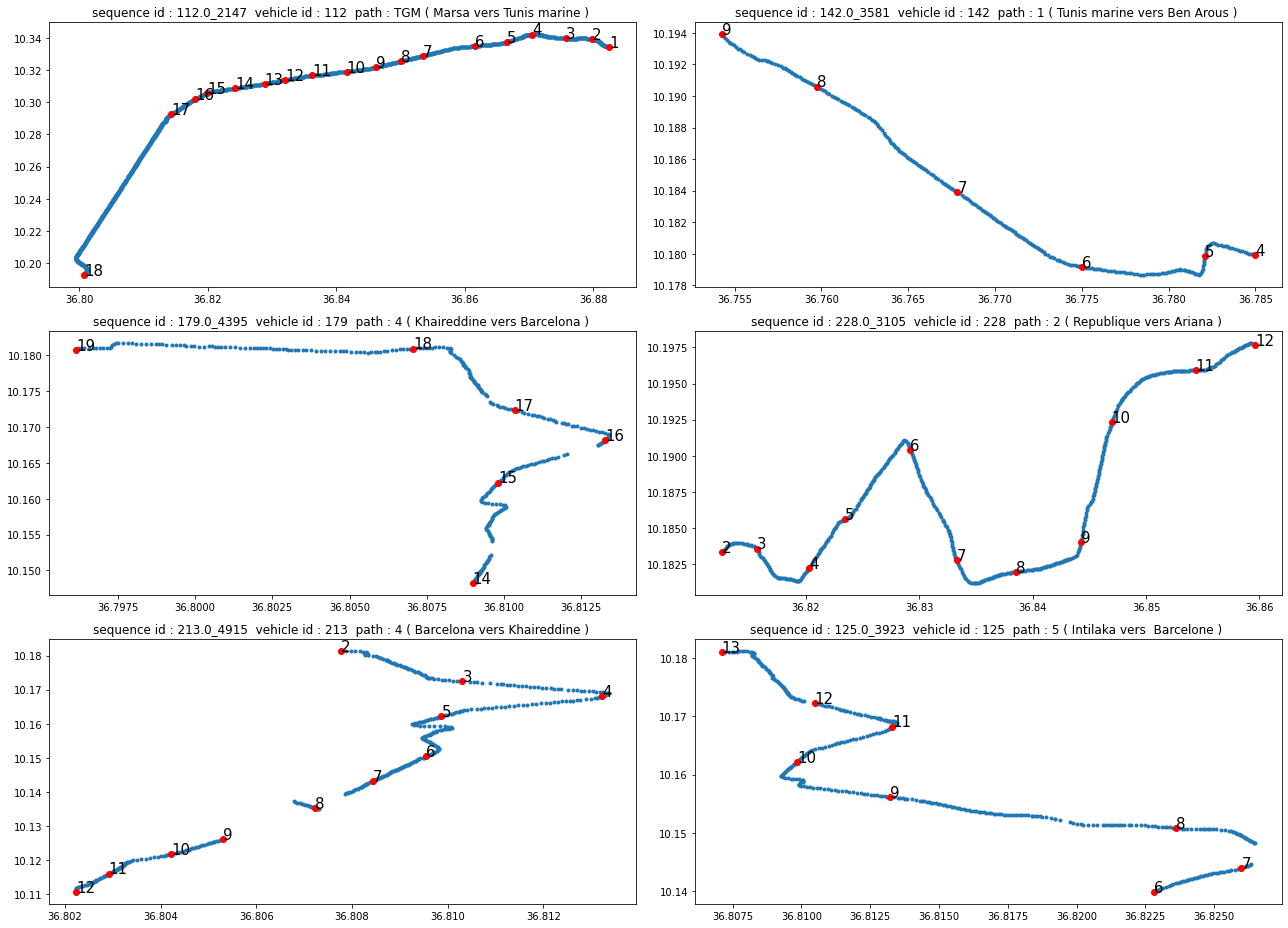

In [45]:
import random
import matplotlib.pyplot as plt

sequence_sample = random.sample(sequence_population,6)
fig, axs = plt.subplots(3, 2, figsize=(18,13))

plot_idx = [[0,0],[0,1],[1,0],[1,1],[2,0],[2,1]]
for k,sequence_id in enumerate(sequence_sample) :

    path = data_records[data_records.sequence_id == sequence_id].line_label.unique().item()
    path_direction = data_records[data_records.sequence_id == sequence_id].french_name.unique().item()

    x = fullpick[fullpick.sequence_id == sequence_id].latitude.values
    y = fullpick[fullpick.sequence_id == sequence_id].longitude.values

    st_x = data_records[data_records.sequence_id == sequence_id].latitude.values
    st_y = data_records[data_records.sequence_id == sequence_id].longitude.values
    st_order =  data_records[data_records.sequence_id == sequence_id].order.values

    i, j = plot_idx[k]
    axs[i,j].set_title('sequence id : ' + sequence_id + '  vehicle id : ' + sequence_id.split('.')[0] + '  path : ' + path + ' ( ' + path_direction + ' ) ')

    for k, order in enumerate(st_order):
        axs[i,j].annotate(order, (st_x[k],st_y[k]), fontsize = 15)
    axs[i,j].plot(x,y,'.')

    axs[i,j].plot(st_x,st_y, 'ro')

plt.tight_layout()
plt.show()